In [2]:
from jupyter_dash import JupyterDash
import scipy.io as sio
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np

In [3]:
# load data
mat = sio.loadmat('./matlab/main/output/output.mat', squeeze_me=True)
all_outputs = mat['out_mat']

In [4]:
peak_params = sorted(list(set(all_outputs['peak'])))
n_peak_params = len(peak_params)
min_peak = min(peak_params)
max_peak = max(peak_params)
peak_params

[1,
 1.05,
 1.1,
 1.15,
 1.2,
 1.25,
 1.3,
 1.35,
 1.4,
 1.45,
 1.5,
 1.55,
 1.6,
 1.65,
 1.7,
 1.75,
 1.8,
 1.85,
 1.9,
 1.95,
 2]

In [5]:
loc_params = sorted(list(set(all_outputs['loc'])))
n_loc_params = len(loc_params)
min_loc = min(loc_params)
max_loc = max(loc_params)
loc_params

[1.9, 2, 2.1]

In [6]:
gain_params = sorted(list(set(all_outputs['gain'])))
n_gain_params = len(gain_params)
min_gain = min(gain_params)
max_gain = max(gain_params)
gain_params

[3]

In [7]:
sensit_params = sorted(list(set(all_outputs['sensit'])))
n_sensit_params = len(sensit_params)
min_sensit = min(sensit_params)
max_sensit = max(sensit_params)
sensit_params


[0.3, 0.31, 0.32, 0.32999999999999996, 0.33999999999999997, 0.35]

In [8]:
pulse_height_params = sorted(list(set(all_outputs['pulse_height'])))
n_pulse_height_params = len(pulse_height_params)
min_pulse_height = min(pulse_height_params)
max_pulse_height = max(pulse_height_params)
pulse_height_params

[1.5]

In [9]:
soma_thresh_params = sorted(list(set(all_outputs['soma_thresh'])))
n_soma_thresh_params = len(soma_thresh_params)
min_soma_thresh = min(soma_thresh_params)
max_soma_thresh = max(soma_thresh_params)
soma_thresh_params

[0.23, 0.24, 0.25]

In [10]:
marks_peak = {}
for peak in peak_params:
    marks_peak[peak] = str(peak)
marks_loc = {}
for loc in loc_params:
    marks_loc[loc] = str(loc)
marks_gain = {}
for gain in gain_params:
    marks_gain[gain] = str(gain)
marks_sensit = {}
for sensit in sensit_params:
    marks_sensit[sensit] = str(sensit)
marks_pulse_height = {}
for pulse_height in pulse_height_params:
    marks_pulse_height[pulse_height] = str(pulse_height)
marks_soma_thresh = {}
for soma_thresh in soma_thresh_params:
    marks_soma_thresh[soma_thresh] = str(soma_thresh)


In [11]:
from collections import defaultdict
data_hashed = defaultdict(lambda: defaultdict(lambda: np.ndarray(0)))
for out in all_outputs:
    peak = out['peak']
    loc = out['loc']
    gain = out['gain']
    sensit = out['sensit']
    pulse_height = out['pulse_height']
    soma_thresh = out['soma_thresh']

    hash_input = str(peak) + str(loc) + str(gain) + str(sensit) + str(pulse_height) + str(soma_thresh)
    data_hashed[hash_input]['Vs'] = out['Vs']
    data_hashed[hash_input]['Vd'] = out['Vd']
    data_hashed[hash_input]['Vd_lin'] = out['Vd_lin']
    data_hashed[hash_input]['time'] = out['time']
    data_hashed[hash_input]['input'] = out['input']

    data_hashed[hash_input]['peak'] = out['peak']
    data_hashed[hash_input]['loc'] = out['loc']
    data_hashed[hash_input]['gain'] = out['gain']
    data_hashed[hash_input]['sensit'] = out['sensit']
    data_hashed[hash_input]['pulse_height'] = out['pulse_height']
    data_hashed[hash_input]['soma_thresh'] = out['soma_thresh']


In [12]:
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        'peak amplitude',
        dcc.Slider(
            id='peak-slider',
            min=min_peak,
            max=max_peak,
            step=None,
            marks=marks_peak,
            value=min_peak,
            updatemode='drag'
        )
    ]),
        html.Label([
        'loc sigmoid',
        dcc.Slider(
            id='loc-slider',
            min=min_loc,
            max=max_loc,
            step=None,
            marks=marks_loc,
            value=min_loc,
            updatemode='drag'
        )
    ]),
        html.Label([
        'gain sigmoid',
        dcc.Slider(
            id='gain-slider',
            min=min_gain,
            max=max_gain,
            step=None,
            marks=marks_gain,
            value=min_gain,
            updatemode='drag'
        )
    ]),
        html.Label([
        'sensit sigmoid',
        dcc.Slider(
            id='sensit-slider',
            min=min_sensit,
            max=max_sensit,
            step=None,
            marks=marks_sensit,
            value=min_sensit,
            updatemode='drag'
        )
    ]),
        html.Label([
        'pulse height',
        dcc.Slider(
            id='pulse-height-slider',
            min=min_pulse_height,
            max=max_pulse_height,
            step=None,
            marks=marks_pulse_height,
            value=min_pulse_height,
            updatemode='drag'
        )
    ]),
        html.Label([
        'soma threshold',
        dcc.Slider(
            id='soma-thresh-slider',
            min=min_soma_thresh,
            max=max_soma_thresh,
            step=None,
            marks=marks_soma_thresh,
            value=min_soma_thresh,
            updatemode='drag'
        )
    ]),
    html.Div(id='slider-output-container'),
])
# Define callback to update graph
@app.callback(
    Output('slider-output-container', 'children'),
    [
        Input('peak-slider', 'value'),
        Input('loc-slider', 'value'),
        Input('gain-slider', 'value'),
        Input('sensit-slider', 'value'),
        Input('pulse-height-slider', 'value'),
        Input('soma-thresh-slider', 'value'),
    ]
)
def display_hash(peak, loc, gain, sensit, pulse_height, soma_thresh):
    return str(peak) + str(loc) + str(gain) + str(sensit) + str(pulse_height) + str(soma_thresh)

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [
        Input('peak-slider', 'value'),
        Input('loc-slider', 'value'),
        Input('gain-slider', 'value'),
        Input('sensit-slider', 'value'),
        Input('pulse-height-slider', 'value'),
        Input('soma-thresh-slider', 'value'),
    ]
)
def update_figure(peak, loc, gain, sensit, pulse_height, soma_thresh):
    layout = go.Layout(
        title='Voltages when given EPSC',
        yaxis=dict(
            title='voltage'
        ),
        xaxis=dict(
            title='time(ms)'
        )
    )
    hash_input = str(peak) + str(loc) + str(gain) + str(sensit) + str(pulse_height) + str(soma_thresh)
    Vs = data_hashed[hash_input]['Vs']
    Vd = data_hashed[hash_input]['Vd']
    Vd_lin = data_hashed[hash_input]['Vd_lin']
    t = data_hashed[hash_input]['time']
    input_pulse = data_hashed[hash_input]['input']
    trace1 = go.Scatter(
        x=t,
        y=Vd,
        mode='lines',
        line=dict(
            shape='spline'
        ),
        name='Vd'
    )
    trace2 = go.Scatter(
        x=t,
        y=Vs,
        mode='lines',
        line=dict(
            shape='spline'
        ),
        name='Vs'
    )
    trace3 = go.Scatter(
        x=t,
        y=input_pulse,
        mode='lines',
        line=dict(
            shape='spline'
        )
    )
    trace4 = go.Scatter(
        x=t,
        y=Vd_lin,
        mode='lines',
        line=dict(
            shape='spline'
        ),
        name='Vd_lin'
    )
    fig = go.Figure(data=[trace1, trace2, trace4], layout=layout)
    return fig
# Run app and display result inline in the notebook
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


In [13]:
# desired params #1
hash1 = "1230.321.50.23"
hash2 = "1.3230.321.50.23"
hash3 = "1.6230.321.50.23"
hash4 = "1.7230.321.50.23"
hash5 = "1.8230.321.50.23"
trace_hashes = [hash2, hash3, hash4]

In [14]:
cleaned_output = []
for h in trace_hashes:
    trace = {}
    trace['Vs'] = data_hashed[h]['Vs']
    trace['Vd'] = data_hashed[h]['Vd']
    trace['Vd_lin'] = data_hashed[h]['Vd_lin']
    trace['time'] = data_hashed[h]['time']
    trace['input'] = data_hashed[h]['input']

    trace['peak'] = data_hashed[h]['peak']
    trace['loc'] = data_hashed[h]['loc']
    trace['gain'] = data_hashed[h]['gain']
    trace['sensit'] = data_hashed[h]['sensit']
    trace['pulse_height'] = data_hashed[h]['pulse_height']
    trace['soma_thresh'] = data_hashed[h]['soma_thresh']
    cleaned_output.append(trace)


In [15]:
cleaned_output[0]['time'][:3]

array([0.        , 0.00020095, 0.00120571])

In [16]:
import matplotlib.pyplot as plt
from ezephys import pltools

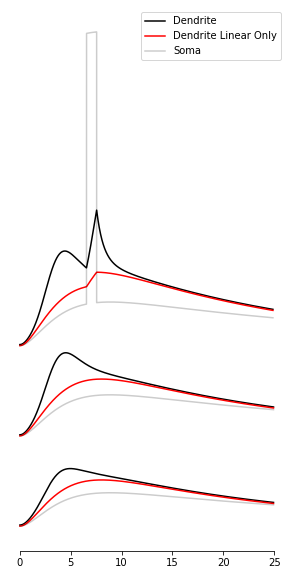

In [39]:
plt.figure(figsize=(5,10))
# ax.xlabel('Time (ms)')
# ax.ylabel('V_d (mV)')
scale_y = 1
offset = scale_y * [0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
for i, trace in enumerate(cleaned_output):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 2500
    Vd = trace['Vd'][:t_end] * scale_y
    Vs = trace['Vs'][:t_end] * scale_y
    Vd_lin = trace['Vd_lin'][:t_end] * scale_y
    time = trace['time'][:t_end]

    Vd_plt = plt.plot(time, offset[i] * i + Vd, 'k-')[0]
    Vd_lin_plt = plt.plot(time, offset[i] * i + Vd_lin, 'k-',  c='r')[0]
    Vs_plt = plt.plot(time, offset[i] * i + Vs, 'k-', alpha=0.2)[0]

# pltools.add_scalebar(x_units='ms', y_units='mV', anchor=(0.5, 0.7), bar_space=0)
Vs_plt.set_label('Soma')
Vd_plt.set_label('Dendrite')
Vd_lin_plt.set_label('Dendrite Linear Only')
pltools.hide_border('trl', trim=True)
plt.legend()
plt.savefig('./figures/recurrent1.svg')